### Başlangıç olarak!

In [8]:
import pandas as pd
import numpy as np

## Pandas Series
İlk olarak bir grup insana ait yaş datasını içeren bir seri datası tanımlıyorum:

In [2]:
ages = pd.Series([25, 16, 34, 30, 42, 52, 12, 21])
ages

0    25
1    16
2    34
3    30
4    42
5    52
6    12
7    21
dtype: int64

ages değişkeni print edildiğinde de görülebileceği gibi dataya otomatik olarak index atanıyor. Burada 8 kişinin yaş datası yer aldığı için 0'dan 7'ye kadar index'ler var. 
Bu indexler kullanılarak datanın elemanlarına ulaşılabilir: 

In [3]:
ages[3]

30

Datanın index bilgisine ayrıcaşu şekilde ulaşılabilir:

In [4]:
ages.index

RangeIndex(start=0, stop=8, step=1)

Burada 0'dan 8'e kadar sayılar dataya index olarak atanıyor. Bu değiştirilebilir. Buradan daanlaşılacağı gibi pandas Seri'leri aslında birer "sıralı sözlük" (ordered dictionary).

In [5]:
ages.index = ["Ahmet", "Meral", "Tuğba", "Hakan", "Sıla", "Zeki", "Kemal", "Neslihan"]
ages

Ahmet       25
Meral       16
Tuğba       34
Hakan       30
Sıla        42
Zeki        52
Kemal       12
Neslihan    21
dtype: int64

Sadece datanın kendisinden datanın içeriği anlaşılmadığı için bu datayı tanımlayabiliriz. Bunun önemi DataFrame objelerini tanımlarken anlaşılacak.

In [6]:
ages.name = "yaş"
ages

Ahmet       25
Meral       16
Tuğba       34
Hakan       30
Sıla        42
Zeki        52
Kemal       12
Neslihan    21
Name: yaş, dtype: int64

Datanın elemanlarının tipinin de int64 olduğu ayrıca görülebiliyor. Klasik numpy methodları ile bu seri hakkında daha çok bilgiye ulaşılabilir:

In [7]:
ages.dtype

dtype('int64')

In [8]:
ages.values

array([25, 16, 34, 30, 42, 52, 12, 21], dtype=int64)

In [9]:
type(ages.values)

numpy.ndarray

Aynı seri'yi farklı yollarla tanımlayabiliriz.

In [10]:
pd.Series({
    "Ahmet" : 25, 
    "Meral" : 16, 
    "Tuğba" : 24, 
    "Hakan" : 30, 
    "Sıla" : 42, 
    "Zeki" : 52, 
    "Kemal" : 12, 
    "Neslihan" : 21
})

Ahmet       25
Meral       16
Tuğba       24
Hakan       30
Sıla        42
Zeki        52
Kemal       12
Neslihan    21
dtype: int64

In [11]:
pd.Series(
    [25, 16, 34, 30, 42, 52, 12, 21],
    index=["Ahmet", "Meral", "Tuğba", "Hakan", "Sıla", "Zeki", "Kemal", "Neslihan"],
    name='yaş')

Ahmet       25
Meral       16
Tuğba       34
Hakan       30
Sıla        42
Zeki        52
Kemal       12
Neslihan    21
Name: yaş, dtype: int64

Index'ler belirtilerek serilerden yeni seriler tanımlanabilir:

In [12]:
pd.Series(ages, index=["Ahmet", "Meral", "Hakan", "Emir"])

Ahmet    25.0
Meral    16.0
Hakan    30.0
Emir      NaN
Name: yaş, dtype: float64

### Index'ler
Seri datasının index'lerinin değiştirilebileceğinden bahsetmiştim. Index değiştirilse bile sayı konumuna halen ulaşılabilir: 

In [13]:
ages.iloc[0]

25

Birden fazla eleman birlikte seçilebilir:

In [14]:
ages[["Meral", "Hakan"]]

Meral    16
Hakan    30
Name: yaş, dtype: int64

In [15]:
ages.iloc[[0, 1]]

Ahmet    25
Meral    16
Name: yaş, dtype: int64

**Dikkat!** İndex range seçilmesi durumunda numpy array'den farklı olarak son eleman da dahil ediliyor.

In [16]:
ages["Ahmet" : "Hakan"]

Ahmet    25
Meral    16
Tuğba    34
Hakan    30
Name: yaş, dtype: int64

iloc numpy array ile aynı çalışıyor 

In [17]:
ages.iloc[0:3]

Ahmet    25
Meral    16
Tuğba    34
Name: yaş, dtype: int64

### Boolean seri'yle şartlı indexleme

In [18]:
ages > 30

Ahmet       False
Meral       False
Tuğba        True
Hakan       False
Sıla         True
Zeki         True
Kemal       False
Neslihan    False
Name: yaş, dtype: bool

In [19]:
ages[ages > 30]

Tuğba    34
Sıla     42
Zeki     52
Name: yaş, dtype: int64

| or  
& and  
~ not

In [20]:
ages[(ages < 20) | (ages > 50)]

Meral    16
Zeki     52
Kemal    12
Name: yaş, dtype: int64

### Matematiksel operasyonlar

In [21]:
ages.mean()

29.0

In [22]:
ages.std()

13.427051585724778

In [23]:
ages * 10000

Ahmet       250000
Meral       160000
Tuğba       340000
Hakan       300000
Sıla        420000
Zeki        520000
Kemal       120000
Neslihan    210000
Name: yaş, dtype: int64

In [24]:
np.log(ages)

Ahmet       3.218876
Meral       2.772589
Tuğba       3.526361
Hakan       3.401197
Sıla        3.737670
Zeki        3.951244
Kemal       2.484907
Neslihan    3.044522
Name: yaş, dtype: float64

In [25]:
ages["Ahmet" : "Hakan"].mean()

26.25

### Seri elemanlarını güncelle

In [26]:
ages["Ahmet"] = 10

In [27]:
ages.iloc[-1] = 10

In [28]:
ages[ages < 20] = 21

## Pandas DataFrames
DataFrame object de Seri'ye çok benzer bir yolla tanımlanabilir.

In [103]:
df = pd.DataFrame({
    'Nüfus': [222320, 430500, 180000, 310000, 90200, 180200, 300000],
    'GDP': [60000, 45000, 30000, 40000, 70000, 55000, 50000],
    'Alan': [120, 60, 70, 250, 130, 300, 400],
    'Kıta': ['Avrupa', 'Asya', 'Avrupa', 'Amerika', 'Avrupa', 'Avrupa', 'Amerika']
}, 
columns=['Nüfus', 'GDP', 'Alan', 'Kıta'])

df

,Nüfus,GDP,Alan,Kıta
0,222320,60000,120,Avrupa
1,430500,45000,60,Asya
2,180000,30000,70,Avrupa
3,310000,40000,250,Amerika
4,90200,70000,130,Avrupa
5,180200,55000,300,Avrupa
6,300000,50000,400,Amerika


index DataFrame'i oluştururken de tanımlanabilirdi, ayrı görebilmek için bu şekilde yazıyorum:

In [104]:
df.index = ['Almanya', 'Japonya', 'İtalya', 'Kanada', 'Norveç', 'İngiltere', 'USA']
df

,Nüfus,GDP,Alan,Kıta
Almanya,222320,60000,120,Avrupa
Japonya,430500,45000,60,Asya
İtalya,180000,30000,70,Avrupa
Kanada,310000,40000,250,Amerika
Norveç,90200,70000,130,Avrupa
İngiltere,180200,55000,300,Avrupa
USA,300000,50000,400,Amerika


DataFrame sütunları (column) aslında birer seri olduğu için DataFrame'i serilerin birleşimi olarak düşünebiliriz.

In [96]:
df.columns

Index(['Nüfus', 'GDP', 'Alan', 'Kıta'], dtype='object')

In [44]:
df.index

Index(['Almanya', 'Japonya', 'İtalya', 'Kanada', 'Norveç', 'İngiltere', 'USA'], dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Almanya to USA
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nüfus   7 non-null      int64 
 1   GDP     7 non-null      int64 
 2   Alan    7 non-null      int64 
 3   Kıta    7 non-null      object
dtypes: int64(3), object(1)
memory usage: 280.0+ bytes


In [46]:
df.size

28

In [47]:
df.shape

(7, 4)

In [48]:
df.describe()

,Nüfus,GDP,Alan
count,7.000000,7.000000,7.000000
mean,244745.714286,50000.000000,190.000000
std,111475.901560,13228.756555,128.840987
min,90200.000000,30000.000000,60.000000
25%,180100.000000,42500.000000,95.000000
50%,222320.000000,50000.000000,130.000000
75%,305000.000000,57500.000000,275.000000
max,430500.000000,70000.000000,400.000000


In [49]:
df.dtypes

Nüfus     int64
GDP       int64
Alan      int64
Kıta     object
dtype: object

In [50]:
df.dtypes.value_counts()

int64     3
object    1
dtype: int64

### indeks'ler

In [51]:
df.loc['Almanya']

Nüfus    222320
GDP       60000
Alan        120
Kıta     Avrupa
Name: Almanya, dtype: object

In [53]:
df.iloc[2]

Nüfus    180000
GDP       30000
Alan         70
Kıta     Avrupa
Name: İtalya, dtype: object

In [54]:
df["Alan"]

Almanya      120
Japonya       60
İtalya        70
Kanada       250
Norveç       130
İngiltere    300
USA          400
Name: Alan, dtype: int64

In [55]:
df.loc["İtalya": "İngiltere"]

,Nüfus,GDP,Alan,Kıta
İtalya,180000,30000,70,Avrupa
Kanada,310000,40000,250,Amerika
Norveç,90200,70000,130,Avrupa
İngiltere,180200,55000,300,Avrupa


In [56]:
df.loc["İtalya": "İngiltere", "Nüfus"]

İtalya       180000
Kanada       310000
Norveç        90200
İngiltere    180200
Name: Nüfus, dtype: int64

In [57]:
df.loc["İtalya": "İngiltere", ["Nüfus", "GDP"]]

,Nüfus,GDP
İtalya,180000,30000
Kanada,310000,40000
Norveç,90200,70000
İngiltere,180200,55000


In [58]:
df.iloc[1:3, 1:3]

,GDP,Alan
Japonya,45000,60
İtalya,30000,70


**Not :** ```iloc``` ve ```loc``` kullanmak doğrudan DataFrame'den indekslemeye göre daha faydalı.

### Şartlı indeksleme

In [61]:
df.loc[df["Alan"] > 150, "Nüfus"]

Kanada       310000
İngiltere    180200
USA          300000
Name: Nüfus, dtype: int64

### DataFrame'den sütun silme (drop)

In [63]:
df2 = df.drop(["Kanada", "Japonya"])
df2

,Nüfus,GDP,Alan,Kıta
Almanya,222320,60000,120,Avrupa
İtalya,180000,30000,70,Avrupa
Norveç,90200,70000,130,Avrupa
İngiltere,180200,55000,300,Avrupa
USA,300000,50000,400,Amerika


In [64]:
df2 = df.drop(columns = ["Nüfus"])
df2

,GDP,Alan,Kıta
Almanya,60000,120,Avrupa
Japonya,45000,60,Asya
İtalya,30000,70,Avrupa
Kanada,40000,250,Amerika
Norveç,70000,130,Avrupa
İngiltere,55000,300,Avrupa
USA,50000,400,Amerika


### Matematiksel işlemler

In [67]:
df2 = df[["Nüfus", "GDP"]] / 100
df2

,Nüfus,GDP
Almanya,2223.2,600.0
Japonya,4305.0,450.0
İtalya,1800.0,300.0
Kanada,3100.0,400.0
Norveç,902.0,700.0
İngiltere,1802.0,550.0
USA,3000.0,500.0


In [72]:
kriz = pd.Series([-5000, -50000], index=["GDP", "Nüfus"])

In [73]:
df2 = df[["GDP", "Nüfus"]] + kriz
df2

,GDP,Nüfus
Almanya,55000,172320
Japonya,40000,380500
İtalya,25000,130000
Kanada,35000,260000
Norveç,65000,40200
İngiltere,50000,130200
USA,45000,250000


### DataFrame'i güncelleme

In [75]:
dil = pd.Series(["Almanca", "Japonca", "İtalyanca", "İngilizce", "Norveçce", "İngilizce", "İngilizce"],
               index= ['Almanya', 'Japonya', 'İtalya', 'Kanada', 'Norveç', 'İngiltere', 'USA'],
               name="Dil")
df["Dil"] = dil
df

,Nüfus,GDP,Alan,Kıta,Dil
Almanya,222320,60000,120,Avrupa,Almanca
Japonya,430500,45000,60,Asya,Japonca
İtalya,180000,30000,70,Avrupa,İtalyanca
Kanada,310000,40000,250,Amerika,İngilizce
Norveç,90200,70000,130,Avrupa,Norveçce
İngiltere,180200,55000,300,Avrupa,İngilizce
USA,300000,50000,400,Amerika,İngilizce


In [84]:
df2 = df.rename(
    columns={
        "GDP": "Milli Gelir",
        "Denizler": "Deniz Kıyıları" 
    },
    index={
        "USA": "United States",
        "İngiltere": "UK"
    }
)
df2

,Nüfus,Milli Gelir,Alan,Kıta,Dil
Almanya,222320,60000,120,Avrupa,Almanca
Japonya,430500,45000,60,Asya,Japonca
İtalya,180000,30000,70,Avrupa,İtalyanca
Kanada,310000,40000,250,Amerika,İngilizce
Norveç,90200,70000,130,Avrupa,Norveçce
UK,180200,55000,300,Avrupa,İngilizce
United States,300000,50000,400,Amerika,İngilizce


In [85]:
df.rename(index=str.upper)

,Nüfus,GDP,Alan,Kıta,Dil
ALMANYA,222320,60000,120,Avrupa,Almanca
JAPONYA,430500,45000,60,Asya,Japonca
İTALYA,180000,30000,70,Avrupa,İtalyanca
KANADA,310000,40000,250,Amerika,İngilizce
NORVEÇ,90200,70000,130,Avrupa,Norveçce
İNGILTERE,180200,55000,300,Avrupa,İngilizce
USA,300000,50000,400,Amerika,İngilizce


In [86]:
df.rename(index=lambda x: x.lower())

,Nüfus,GDP,Alan,Kıta,Dil
almanya,222320,60000,120,Avrupa,Almanca
japonya,430500,45000,60,Asya,Japonca
i̇talya,180000,30000,70,Avrupa,İtalyanca
kanada,310000,40000,250,Amerika,İngilizce
norveç,90200,70000,130,Avrupa,Norveçce
i̇ngiltere,180200,55000,300,Avrupa,İngilizce
usa,300000,50000,400,Amerika,İngilizce


In [97]:
df.drop(columns="GDP", inplace=False) # inplace True df değişkeninin kendisini değiştirir

,Nüfus,Alan,Kıta
Almanya,222320,120,Avrupa
Japonya,430500,60,Asya
İtalya,180000,70,Avrupa
Kanada,310000,250,Amerika
Norveç,90200,130,Avrupa
İngiltere,180200,300,Avrupa
USA,300000,400,Amerika


In [99]:
df2 = df.append(
    pd.Series(
        {
            "Nüfus" : 10,
            "GDP": 5
        }, name="Çin"
    )
)
df2

,Nüfus,GDP,Alan,Kıta
Almanya,222320.0,60000.0,120.0,Avrupa
Japonya,430500.0,45000.0,60.0,Asya
İtalya,180000.0,30000.0,70.0,Avrupa
Kanada,310000.0,40000.0,250.0,Amerika
Norveç,90200.0,70000.0,130.0,Avrupa
İngiltere,180200.0,55000.0,300.0,Avrupa
USA,300000.0,50000.0,400.0,Amerika
Çin,10.0,5.0,NaN,NaN


In [100]:
df.loc["Çin"] = pd.Series(
        {
            "Nüfus" : 10,
            "GDP": 5
        }, name="Çin"
    )
df

,Nüfus,GDP,Alan,Kıta
Almanya,222320.0,60000.0,120.0,Avrupa
Japonya,430500.0,45000.0,60.0,Asya
İtalya,180000.0,30000.0,70.0,Avrupa
Kanada,310000.0,40000.0,250.0,Amerika
Norveç,90200.0,70000.0,130.0,Avrupa
İngiltere,180200.0,55000.0,300.0,Avrupa
USA,300000.0,50000.0,400.0,Amerika
Çin,10.0,5.0,NaN,NaN


In [101]:
df.reset_index()

,index,Nüfus,GDP,Alan,Kıta
0,Almanya,222320.0,60000.0,120.0,Avrupa
1,Japonya,430500.0,45000.0,60.0,Asya
2,İtalya,180000.0,30000.0,70.0,Avrupa
3,Kanada,310000.0,40000.0,250.0,Amerika
4,Norveç,90200.0,70000.0,130.0,Avrupa
5,İngiltere,180200.0,55000.0,300.0,Avrupa
6,USA,300000.0,50000.0,400.0,Amerika
7,Çin,10.0,5.0,NaN,NaN


In [102]:
df.set_index("Nüfus")

,GDP,Alan,Kıta
Nüfus,,,
222320.0,60000.0,120.0,Avrupa
430500.0,45000.0,60.0,Asya
180000.0,30000.0,70.0,Avrupa
310000.0,40000.0,250.0,Amerika
90200.0,70000.0,130.0,Avrupa
180200.0,55000.0,300.0,Avrupa
300000.0,50000.0,400.0,Amerika
10.0,5.0,NaN,NaN


### Sütunlardan yeni sütun oluşturma

In [107]:
df["Kişi başına GDP"] = df["GDP"] / df["Nüfus"]
df

,Nüfus,GDP,Alan,Kıta,Kişi başına GDP
Almanya,222320,60000,120,Avrupa,0.269881
Japonya,430500,45000,60,Asya,0.104530
İtalya,180000,30000,70,Avrupa,0.166667
Kanada,310000,40000,250,Amerika,0.129032
Norveç,90200,70000,130,Avrupa,0.776053
İngiltere,180200,55000,300,Avrupa,0.305216
USA,300000,50000,400,Amerika,0.166667


### istatistiksel bilgiler

In [108]:
df.head()

,Nüfus,GDP,Alan,Kıta,Kişi başına GDP
Almanya,222320,60000,120,Avrupa,0.269881
Japonya,430500,45000,60,Asya,0.104530
İtalya,180000,30000,70,Avrupa,0.166667
Kanada,310000,40000,250,Amerika,0.129032
Norveç,90200,70000,130,Avrupa,0.776053


In [109]:
df.describe()

,Nüfus,GDP,Alan,Kişi başına GDP
count,7.000000,7.000000,7.000000,7.000000
mean,244745.714286,50000.000000,190.000000,0.274007
std,111475.901560,13228.756555,128.840987,0.233033
min,90200.000000,30000.000000,60.000000,0.104530
25%,180100.000000,42500.000000,95.000000,0.147849
50%,222320.000000,50000.000000,130.000000,0.166667
75%,305000.000000,57500.000000,275.000000,0.287549
max,430500.000000,70000.000000,400.000000,0.776053


In [110]:
gdp = df["GDP"]

In [113]:
gdp.min(), gdp.sum(), gdp.mean(), gdp.std(), gdp.median()

(30000, 350000, 50000.0, 13228.756555322952, 50000.0)

In [115]:
gdp.describe()

count        7.000000
mean     50000.000000
std      13228.756555
min      30000.000000
25%      42500.000000
50%      50000.000000
75%      57500.000000
max      70000.000000
Name: GDP, dtype: float64

In [121]:
gdp.quantile(0.5)

50000.0

In [122]:
gdp.quantile([0, 0.2, 0.4, 0.6, 1])

0.0    30000.0
0.2    41000.0
0.4    47000.0
0.6    53000.0
1.0    70000.0
Name: GDP, dtype: float64

## Harici datayı okuma ve yazma & plot etme

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
Docstring:
Read a comma-separated values (csv) file into DataFrame.

Also supports option

In [18]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [21]:
df.columns = ["Timestamp", "Fiyat"]
df.head()

,Timestamp,Fiyat
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [22]:
df.shape

(365, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Fiyat      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [24]:
df.dtypes

Timestamp     object
Fiyat        float64
dtype: object

In [29]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.head()

,Timestamp,Fiyat
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [31]:
df.set_index("Timestamp", inplace=True)

In [32]:
df.loc["2017-04-29"]

Fiyat    1334.979038
Name: 2017-04-29 00:00:00, dtype: float64

Bütün bu işlemleri ```read_csv``` fonksiyonu da yapabiliyor:

In [34]:
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Fiyat'],
    index_col=0,
    parse_dates=True
)
df.head()

,Fiyat
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


### plot

<AxesSubplot:xlabel='Timestamp'>

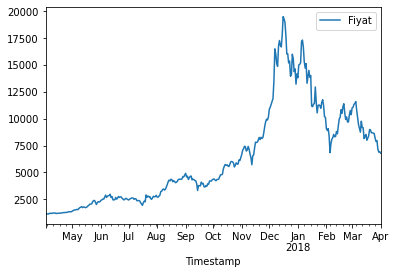

In [49]:
df.plot()

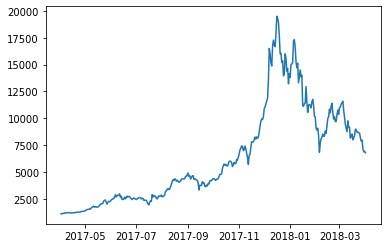

In [36]:
plt.plot(df.index, df["Fiyat"])

## 2. bir örnek

In [50]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=[0], index_col=0)
eth.head()

,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [51]:
pd.to_datetime(eth['UnixTimeStamp']).head()

Date(UTC)
2017-04-02   1970-01-01 00:00:01.491091200
2017-04-03   1970-01-01 00:00:01.491177600
2017-04-04   1970-01-01 00:00:01.491264000
2017-04-05   1970-01-01 00:00:01.491350400
2017-04-06   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

In [54]:
prices = pd.DataFrame(index=df.index)
prices['Bitcoin'] = df['Fiyat']
prices['Ether'] = eth['Value']
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

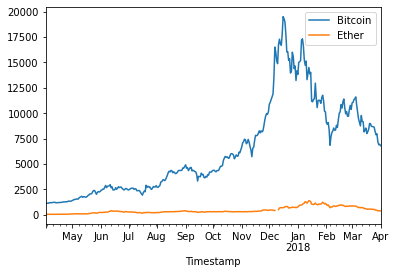

In [55]:
prices.plot()

kayıp dataya dikkat

<AxesSubplot:xlabel='Timestamp'>

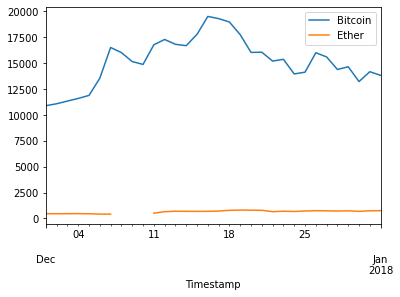

In [56]:
prices.loc['2017-12-01':'2018-01-01'].plot()

## Referanslar
[1] [freecodecamp-intro-to-pandas](https://github.com/ine-rmotr-curriculum/freecodecamp-intro-to-pandas)  
[2] [Data Analysis with Python - Full Course for Beginners (Numpy, Pandas, Matplotlib, Seaborn)](https://youtu.be/r-uOLxNrNk8)